# Insurance Premium Prediction

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

## Importing Datasets

In [2]:
medical_df = pd.read_csv(r"C:\Users\iamri\Downloads\insurance.csv") 
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## Exploratory Data Analysis

In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']=(10,6)

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

## Distribution of Age

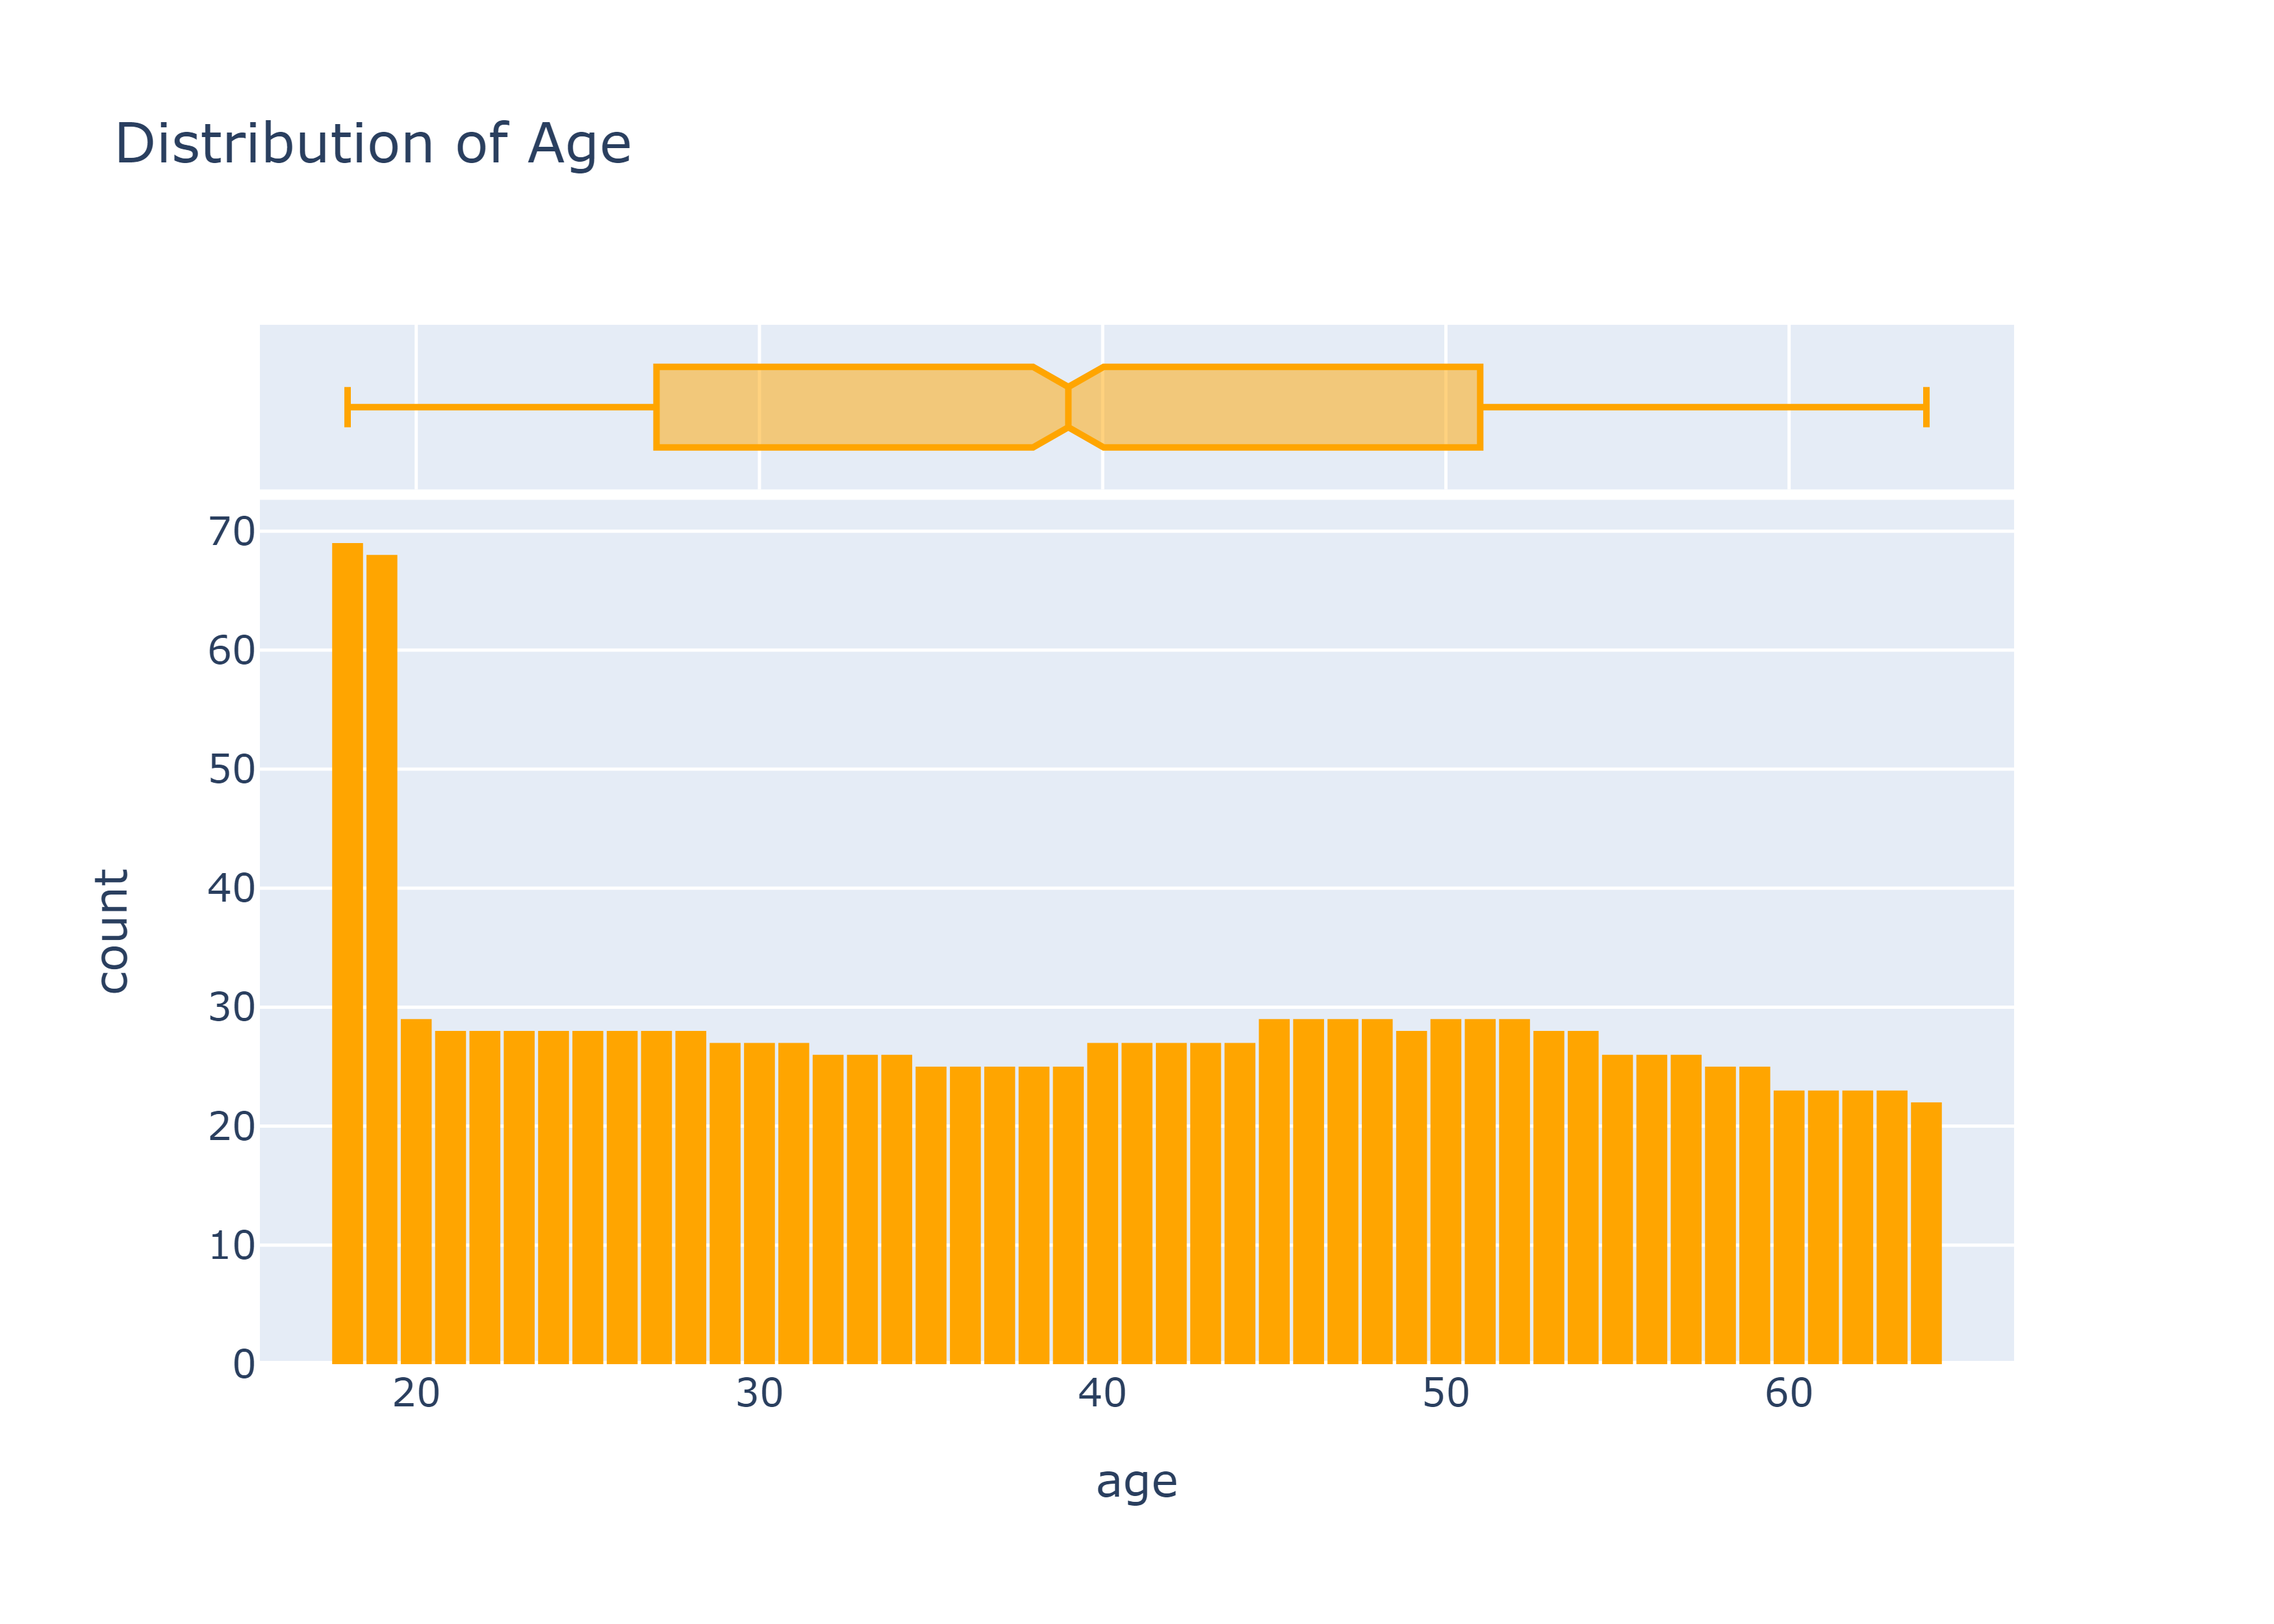

In [7]:
fig = px.histogram(medical_df,x='age',marginal="box",nbins=64,color_discrete_sequence=["orange"],title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.write_image("plot.png",scale=5)
Image("plot.png")

Almost all age between 20-64 is around 25 to 30.
18-19 are outliers at around 68


## Distribution of BMI

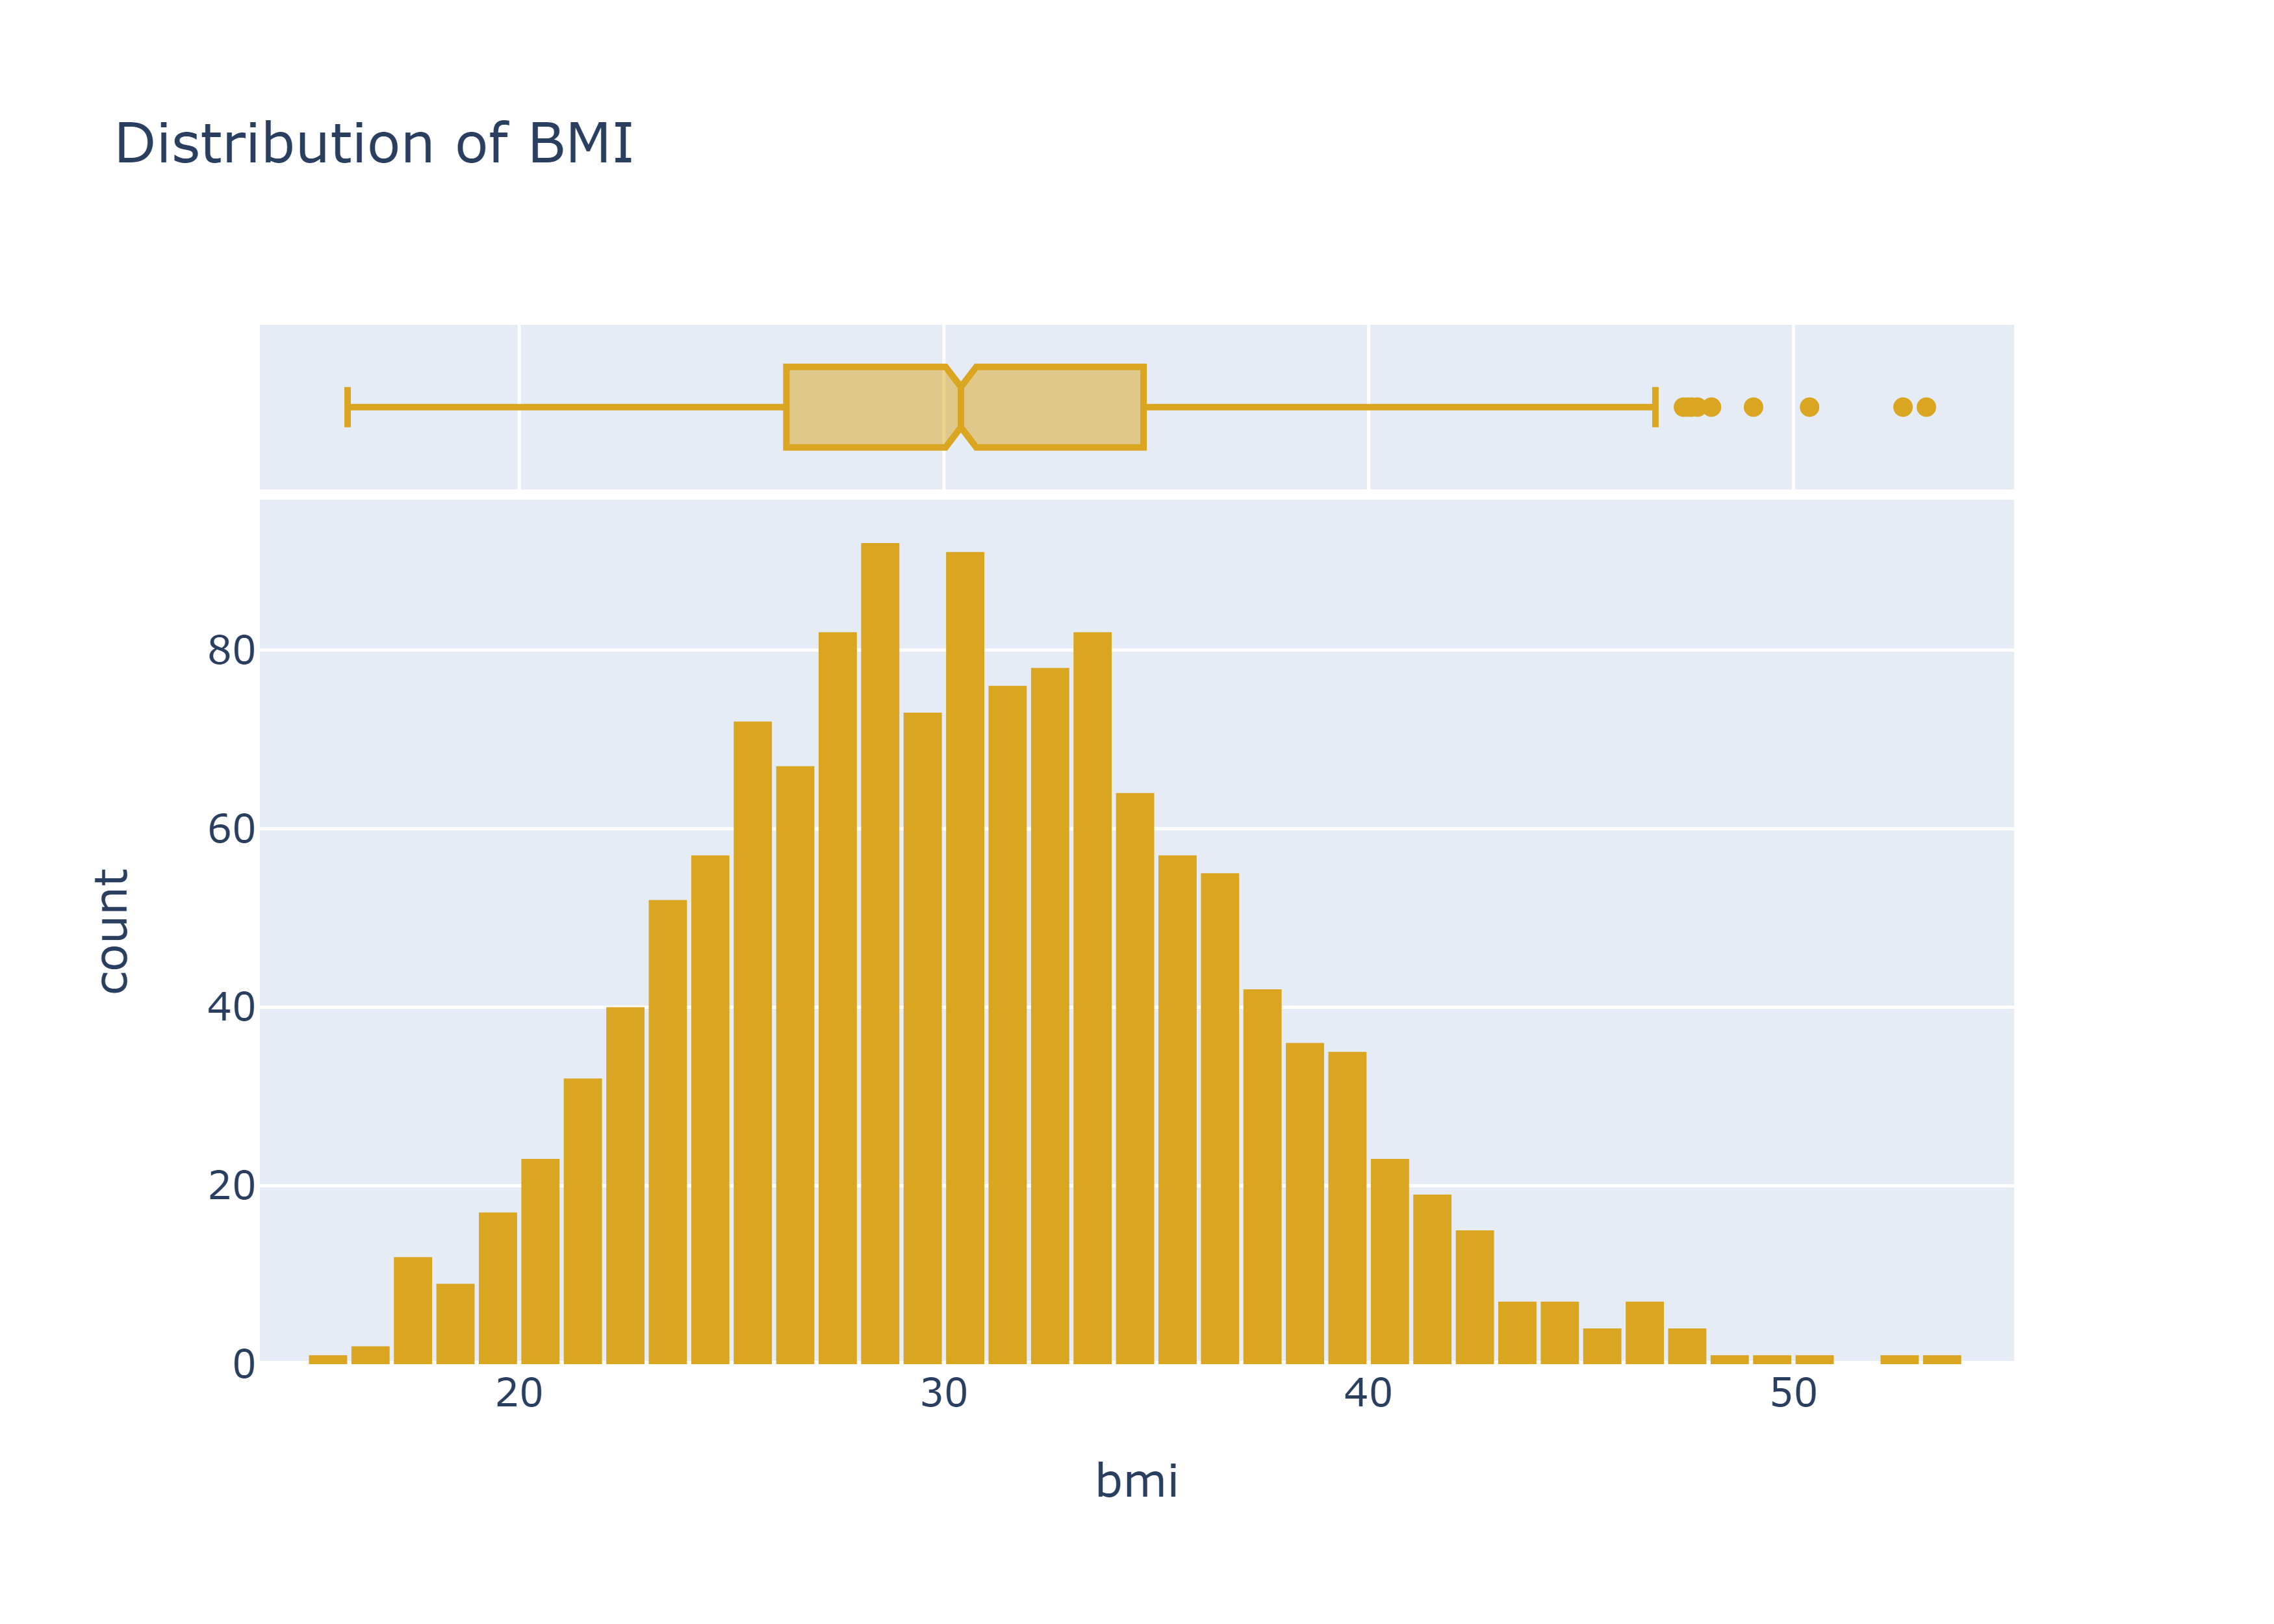

In [8]:
fig = px.histogram(medical_df,x="bmi",marginal="box",color_discrete_sequence=["goldenrod"],title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.write_image("plot.png",scale=5)
Image("plot.png")

Bmi follows normal distribution , mean around 32

## Annual Medical Charges

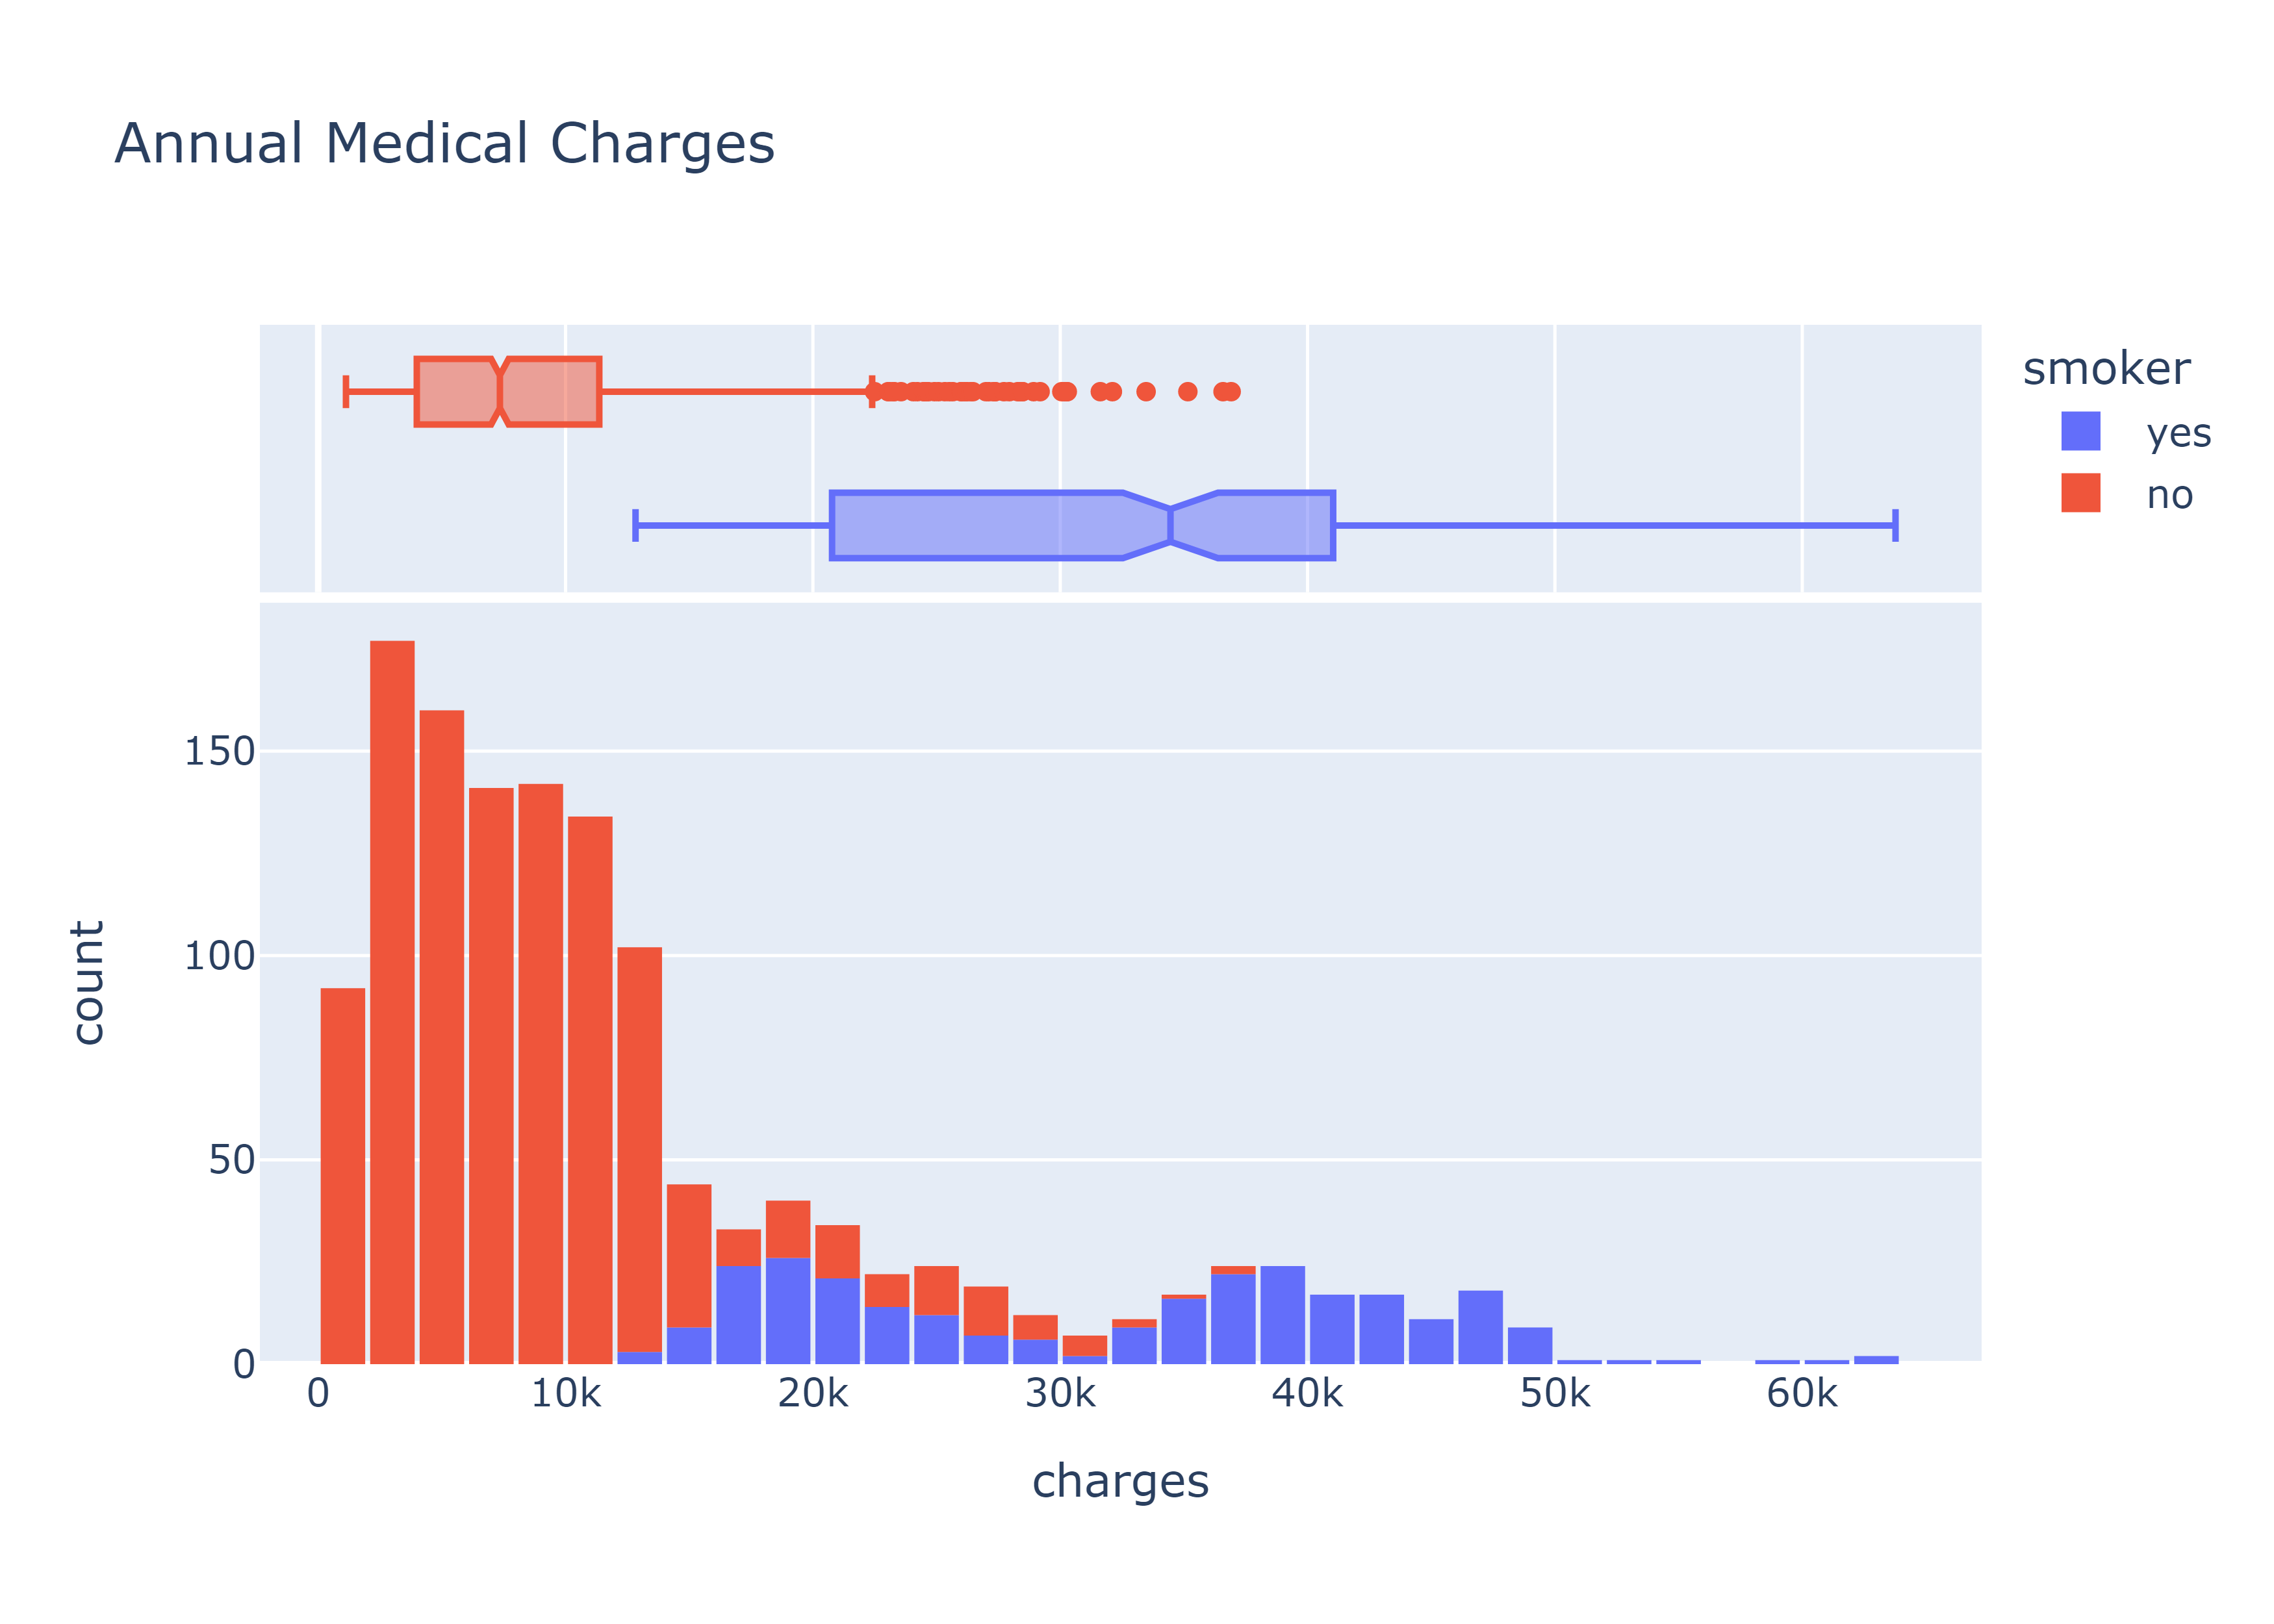

In [9]:
ax= px.histogram(medical_df,x="charges", marginal="box",nbins=47,color="smoker",title="Annual Medical Charges")
ax.update_layout(bargap=0.1)
ax.write_image("plot.png",scale=5)
Image("plot.png")

Annual charges of Non smoker is less then of those who smoke.

In [10]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## Smoker vs Non Smoker

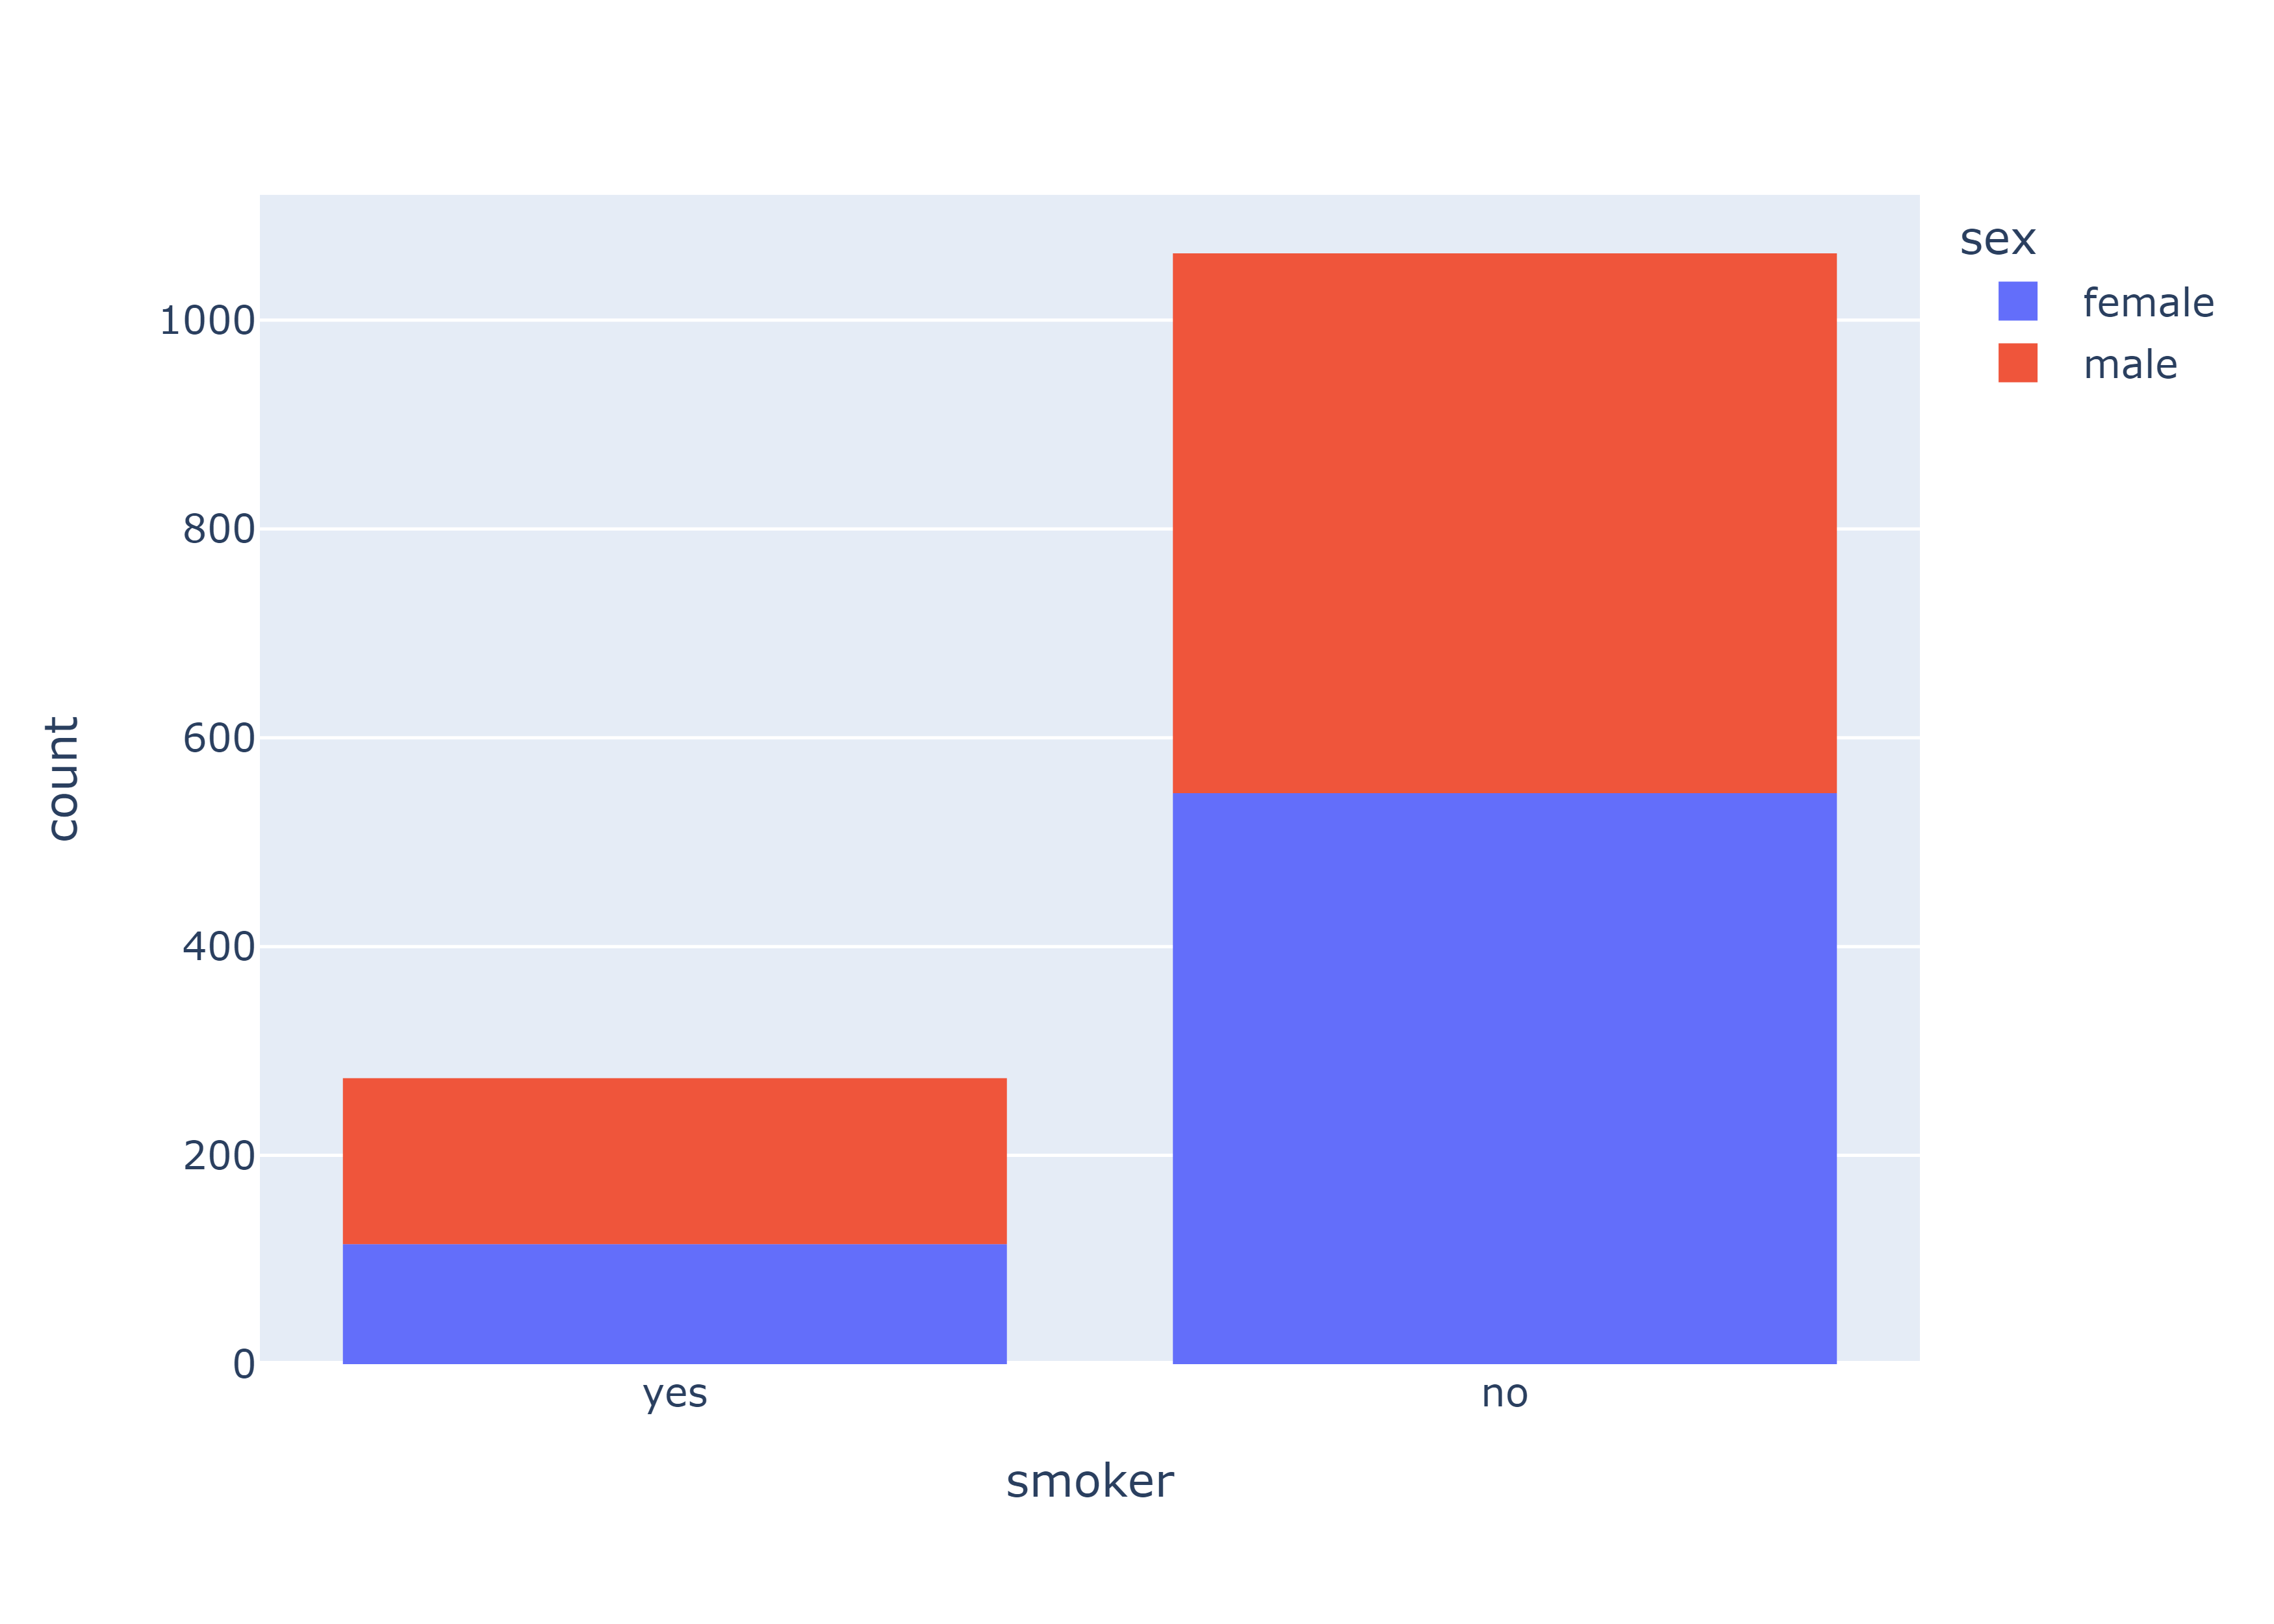

In [11]:
fig=px.histogram(medical_df,x="smoker",nbins=1,color="sex")
fig.write_image("plot.png",scale=5)
Image("plot.png")

## Age vs charges Scatterplot

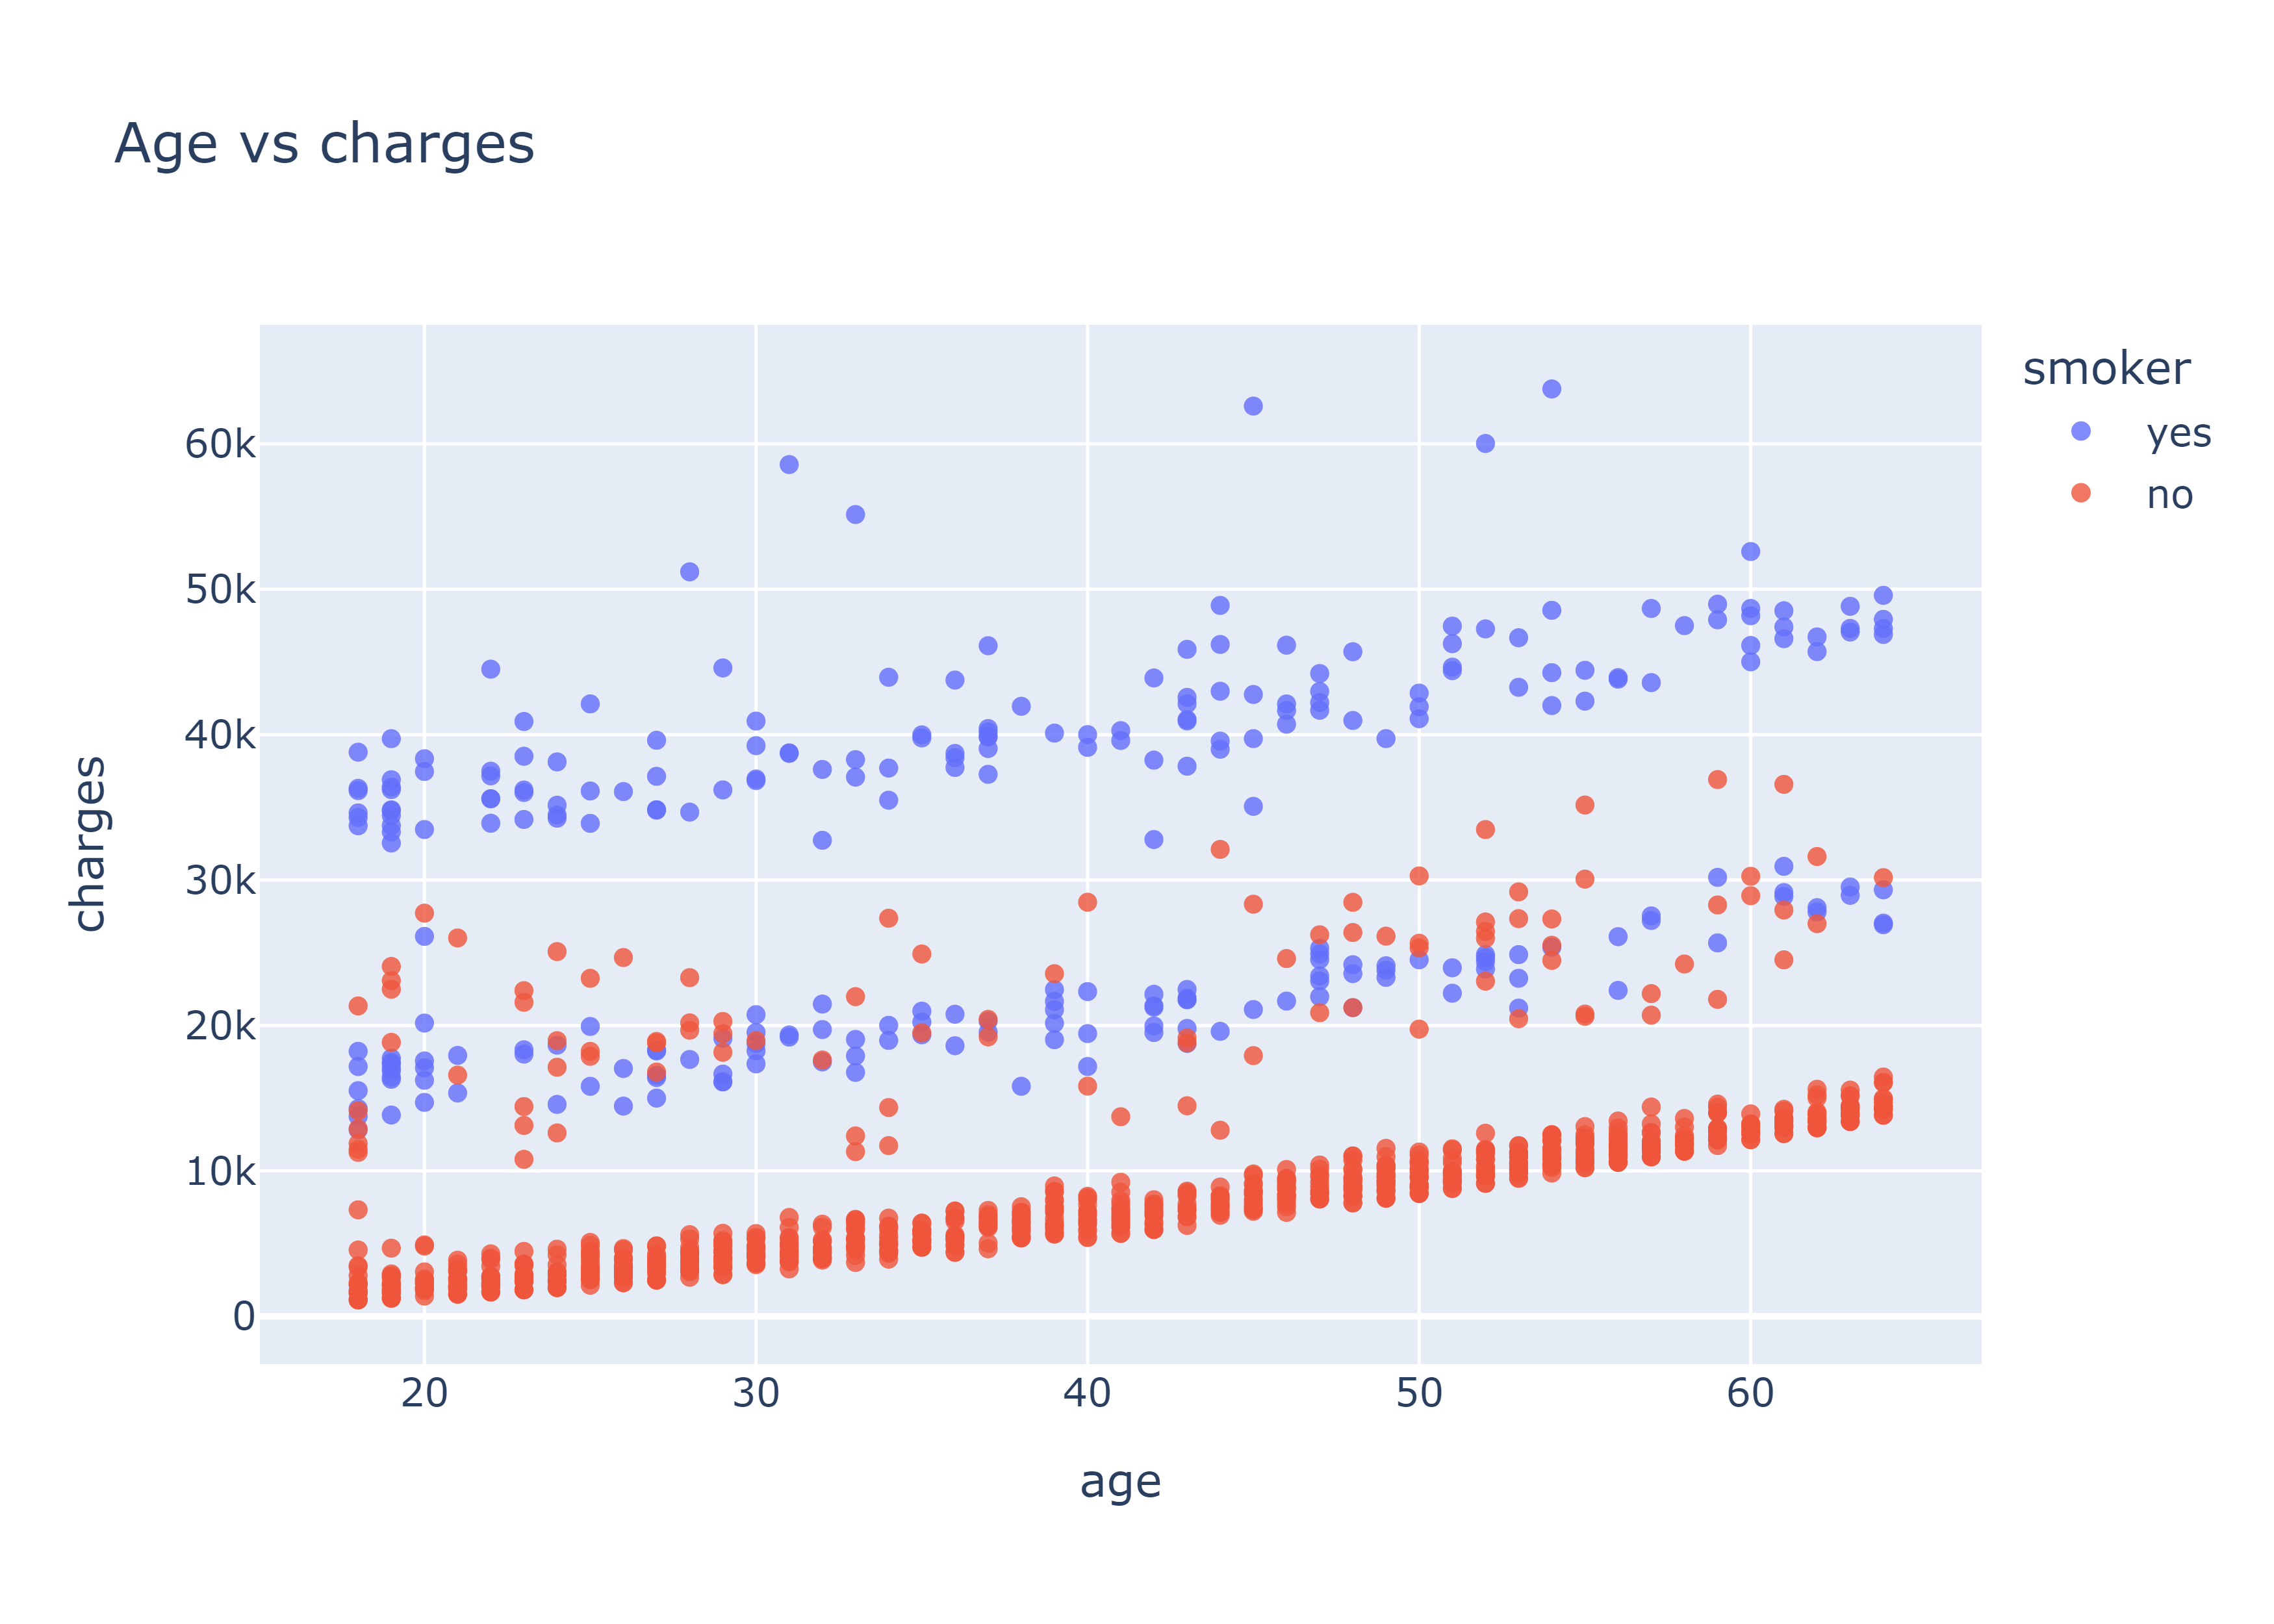

In [12]:
fig=px.scatter(medical_df,x="age",y="charges",color="smoker",opacity=0.8,hover_data=["sex"],title="Age vs charges")
fig.show()
fig.write_image("plot.png",scale=5)
Image("plot.png")

## Bmi vs Charges

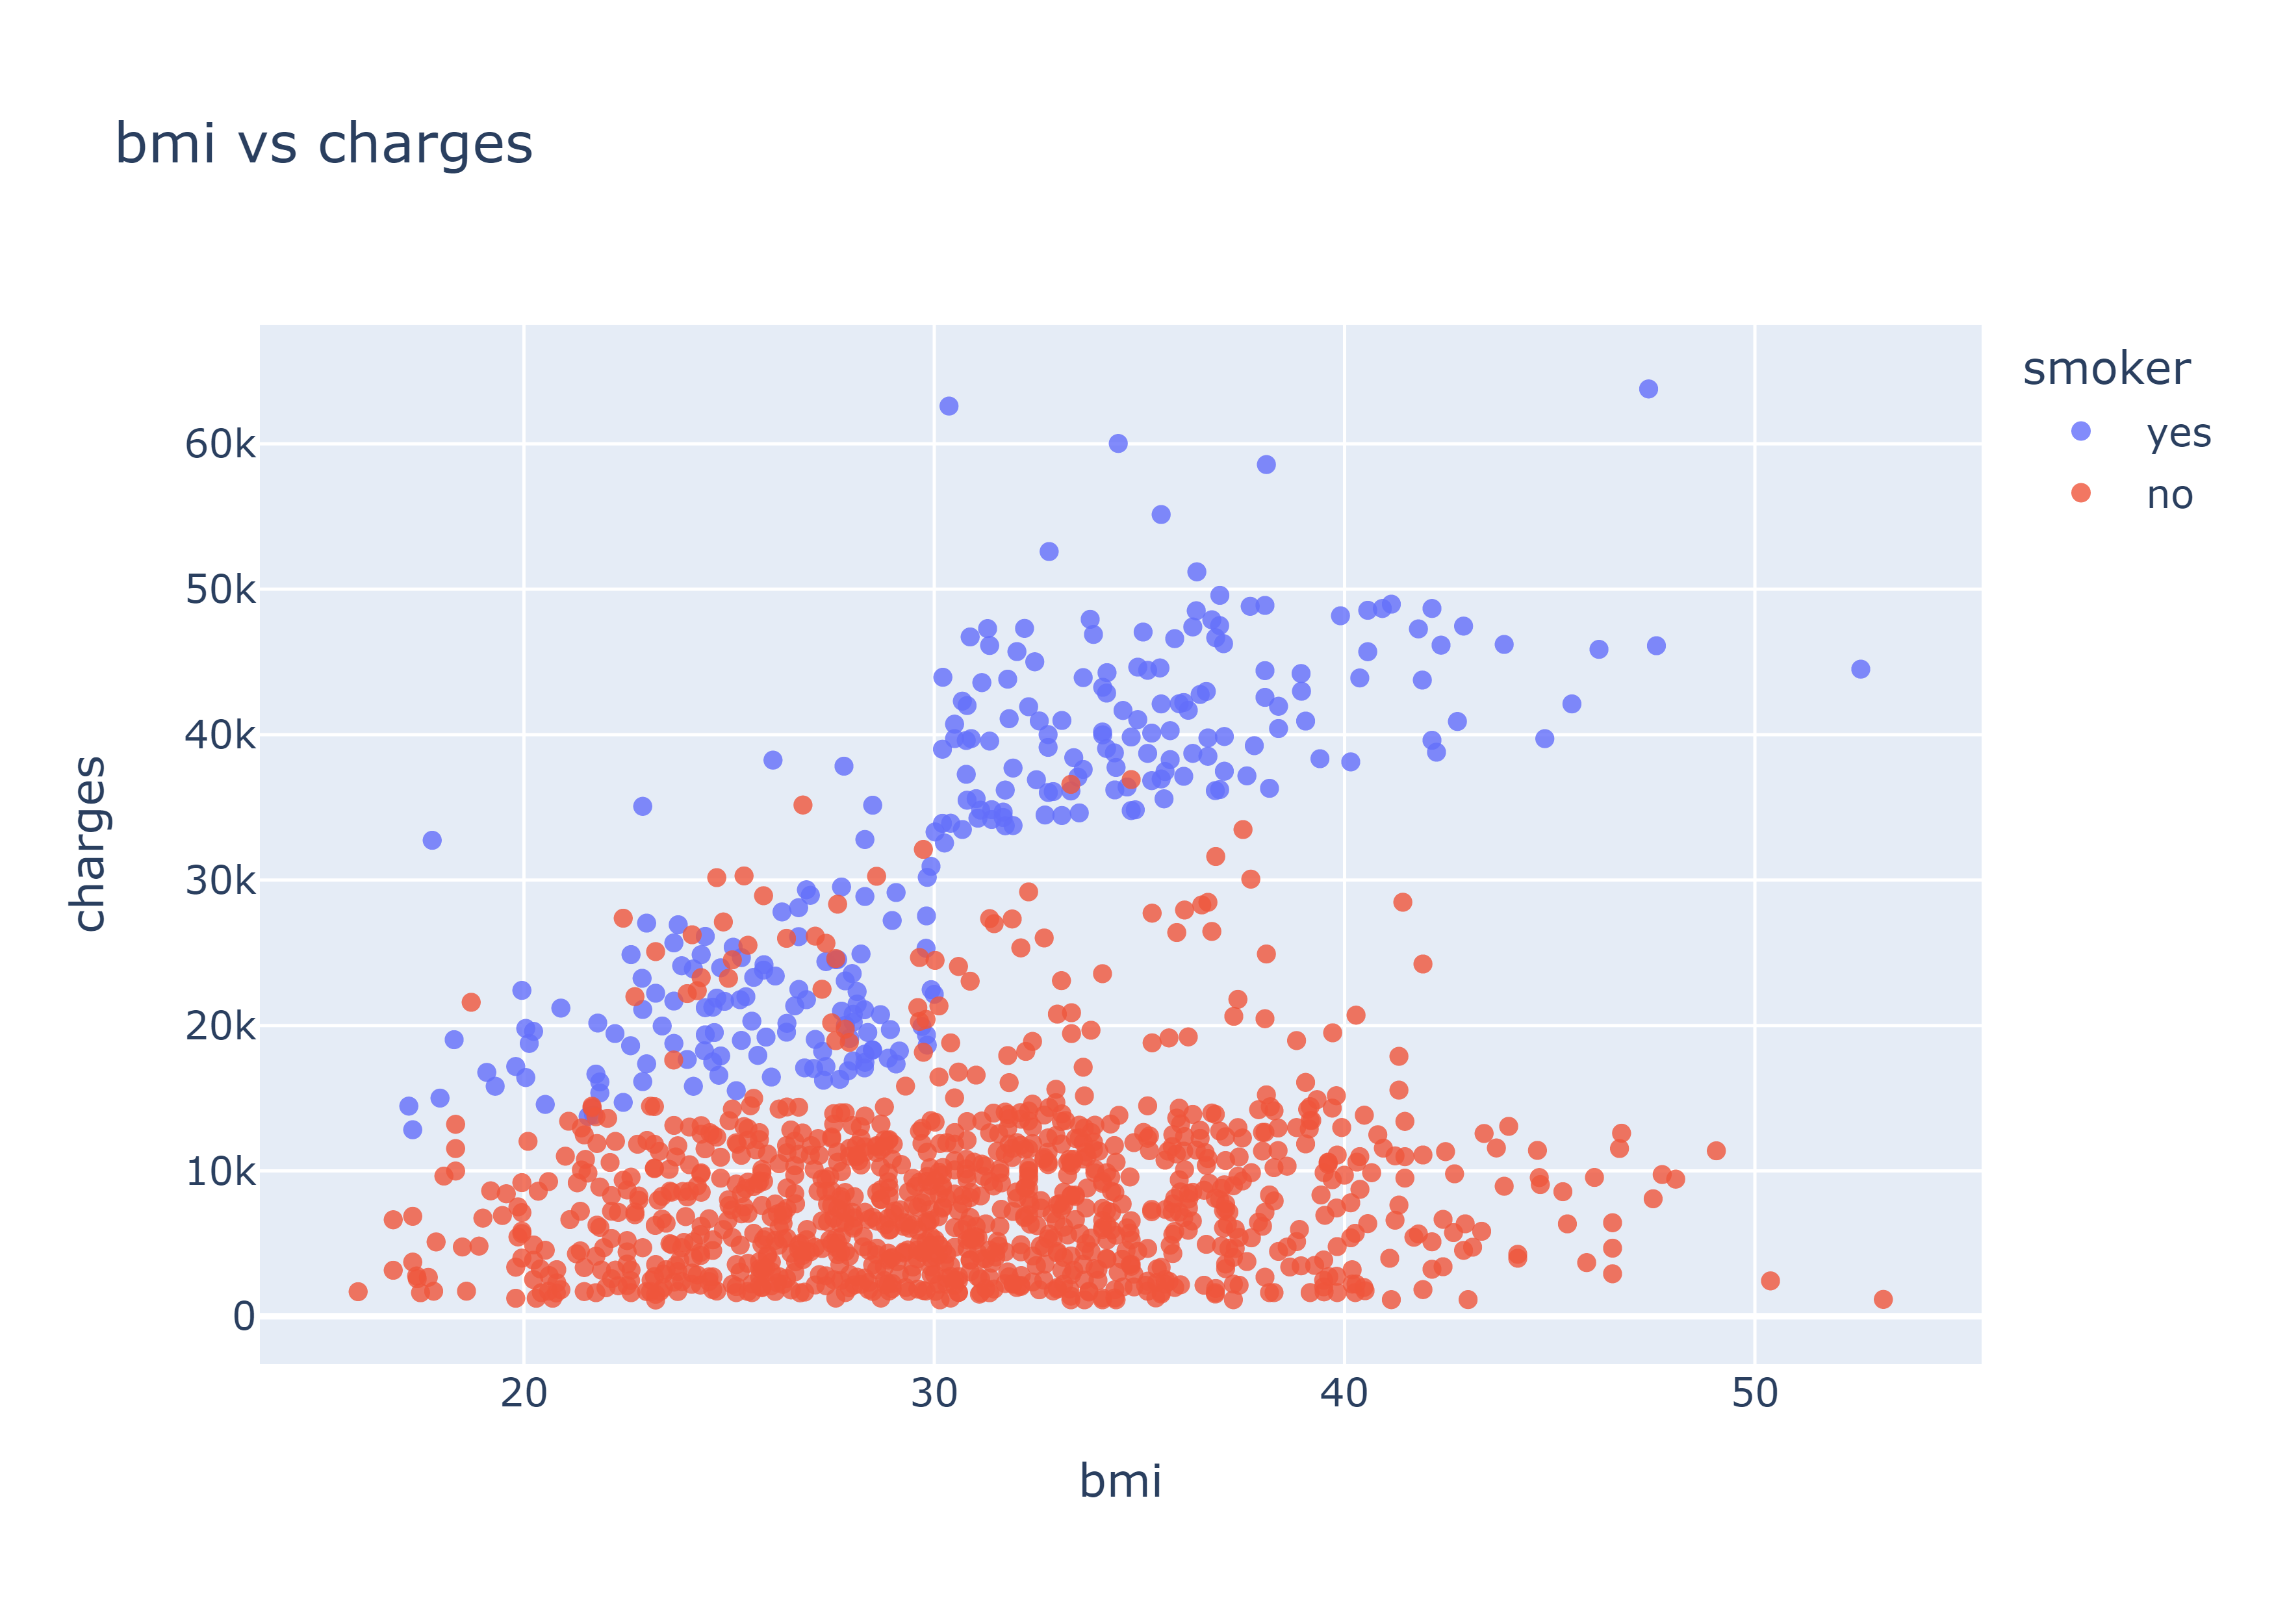

In [13]:
fig=px.scatter(medical_df,x="bmi",y="charges",color="smoker",opacity=0.8,hover_data=["sex"],title="bmi vs charges")
fig.show()
fig.write_image("plot.png",scale=5)
Image("plot.png")

## Violin graph of Children vs Charges

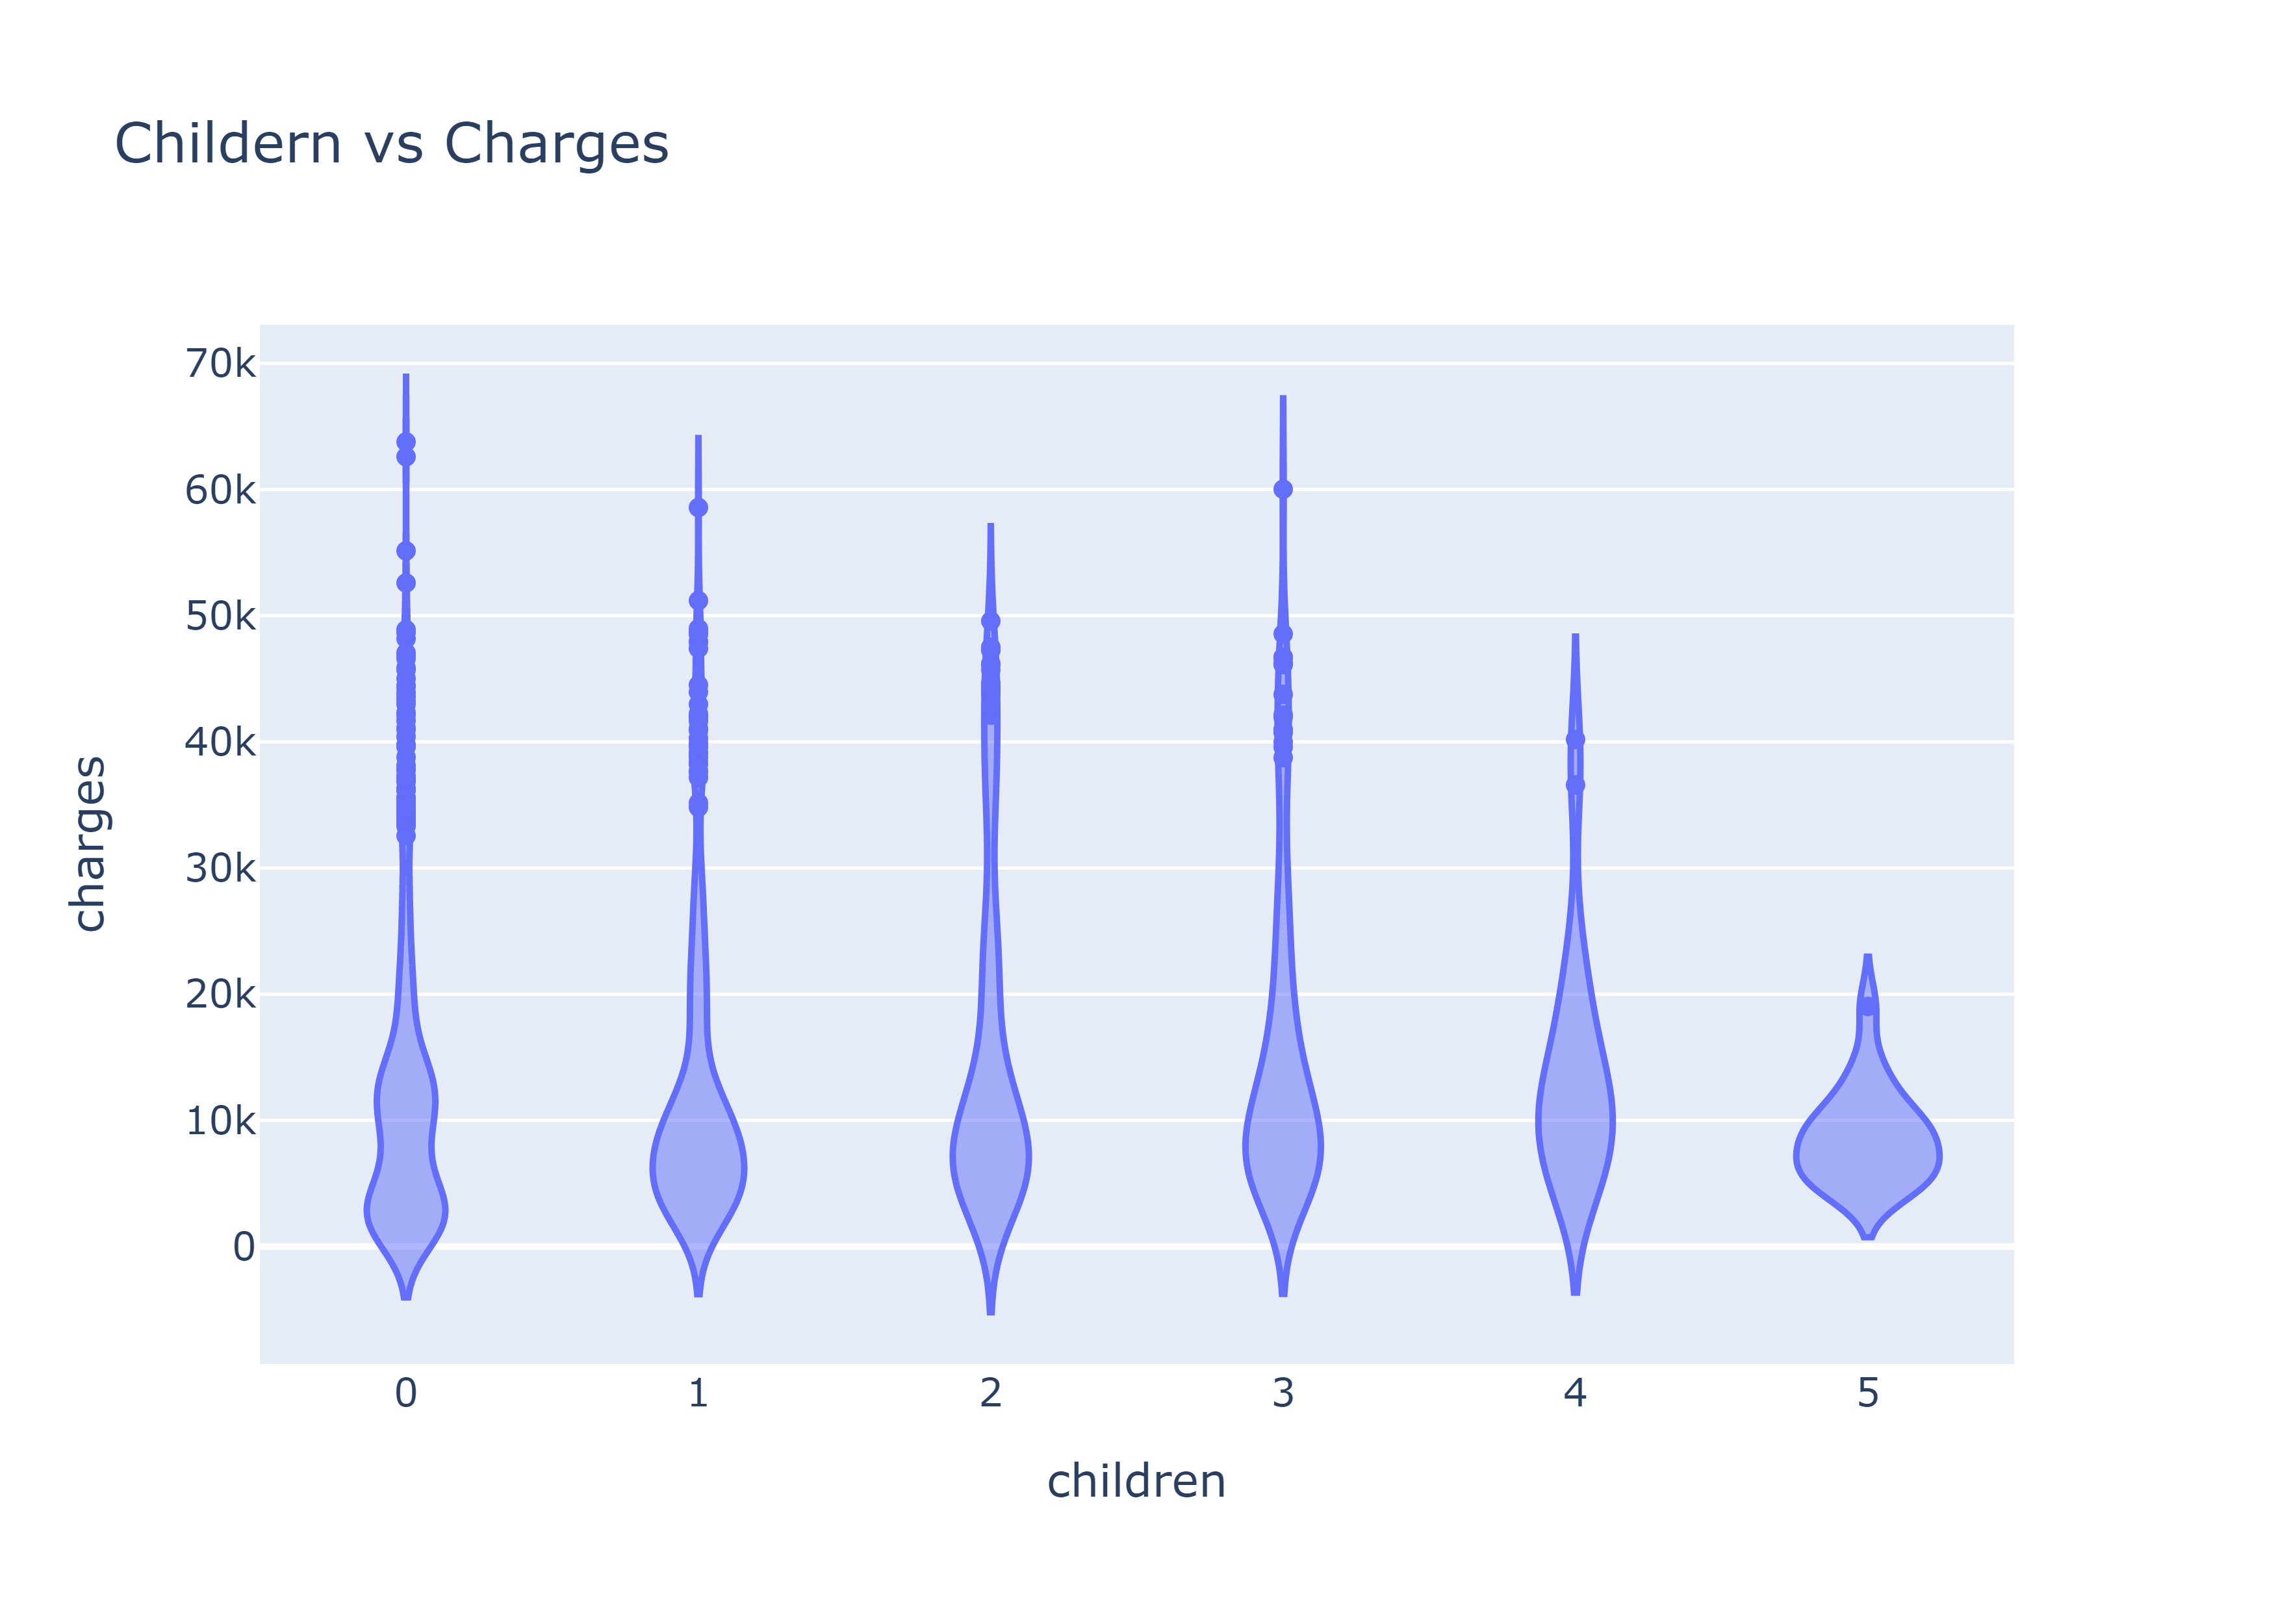

In [14]:
fig=px.violin(medical_df,x="children",y="charges",title="Childern vs Charges")
fig.write_image("plot.png",scale=5)
Image("plot.png")

## Creating non smoker dataset

In [15]:
non_smoker = medical_df[medical_df.smoker=="no"]
non_smoker

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]

# 3D plot of Charges, BMI and Age

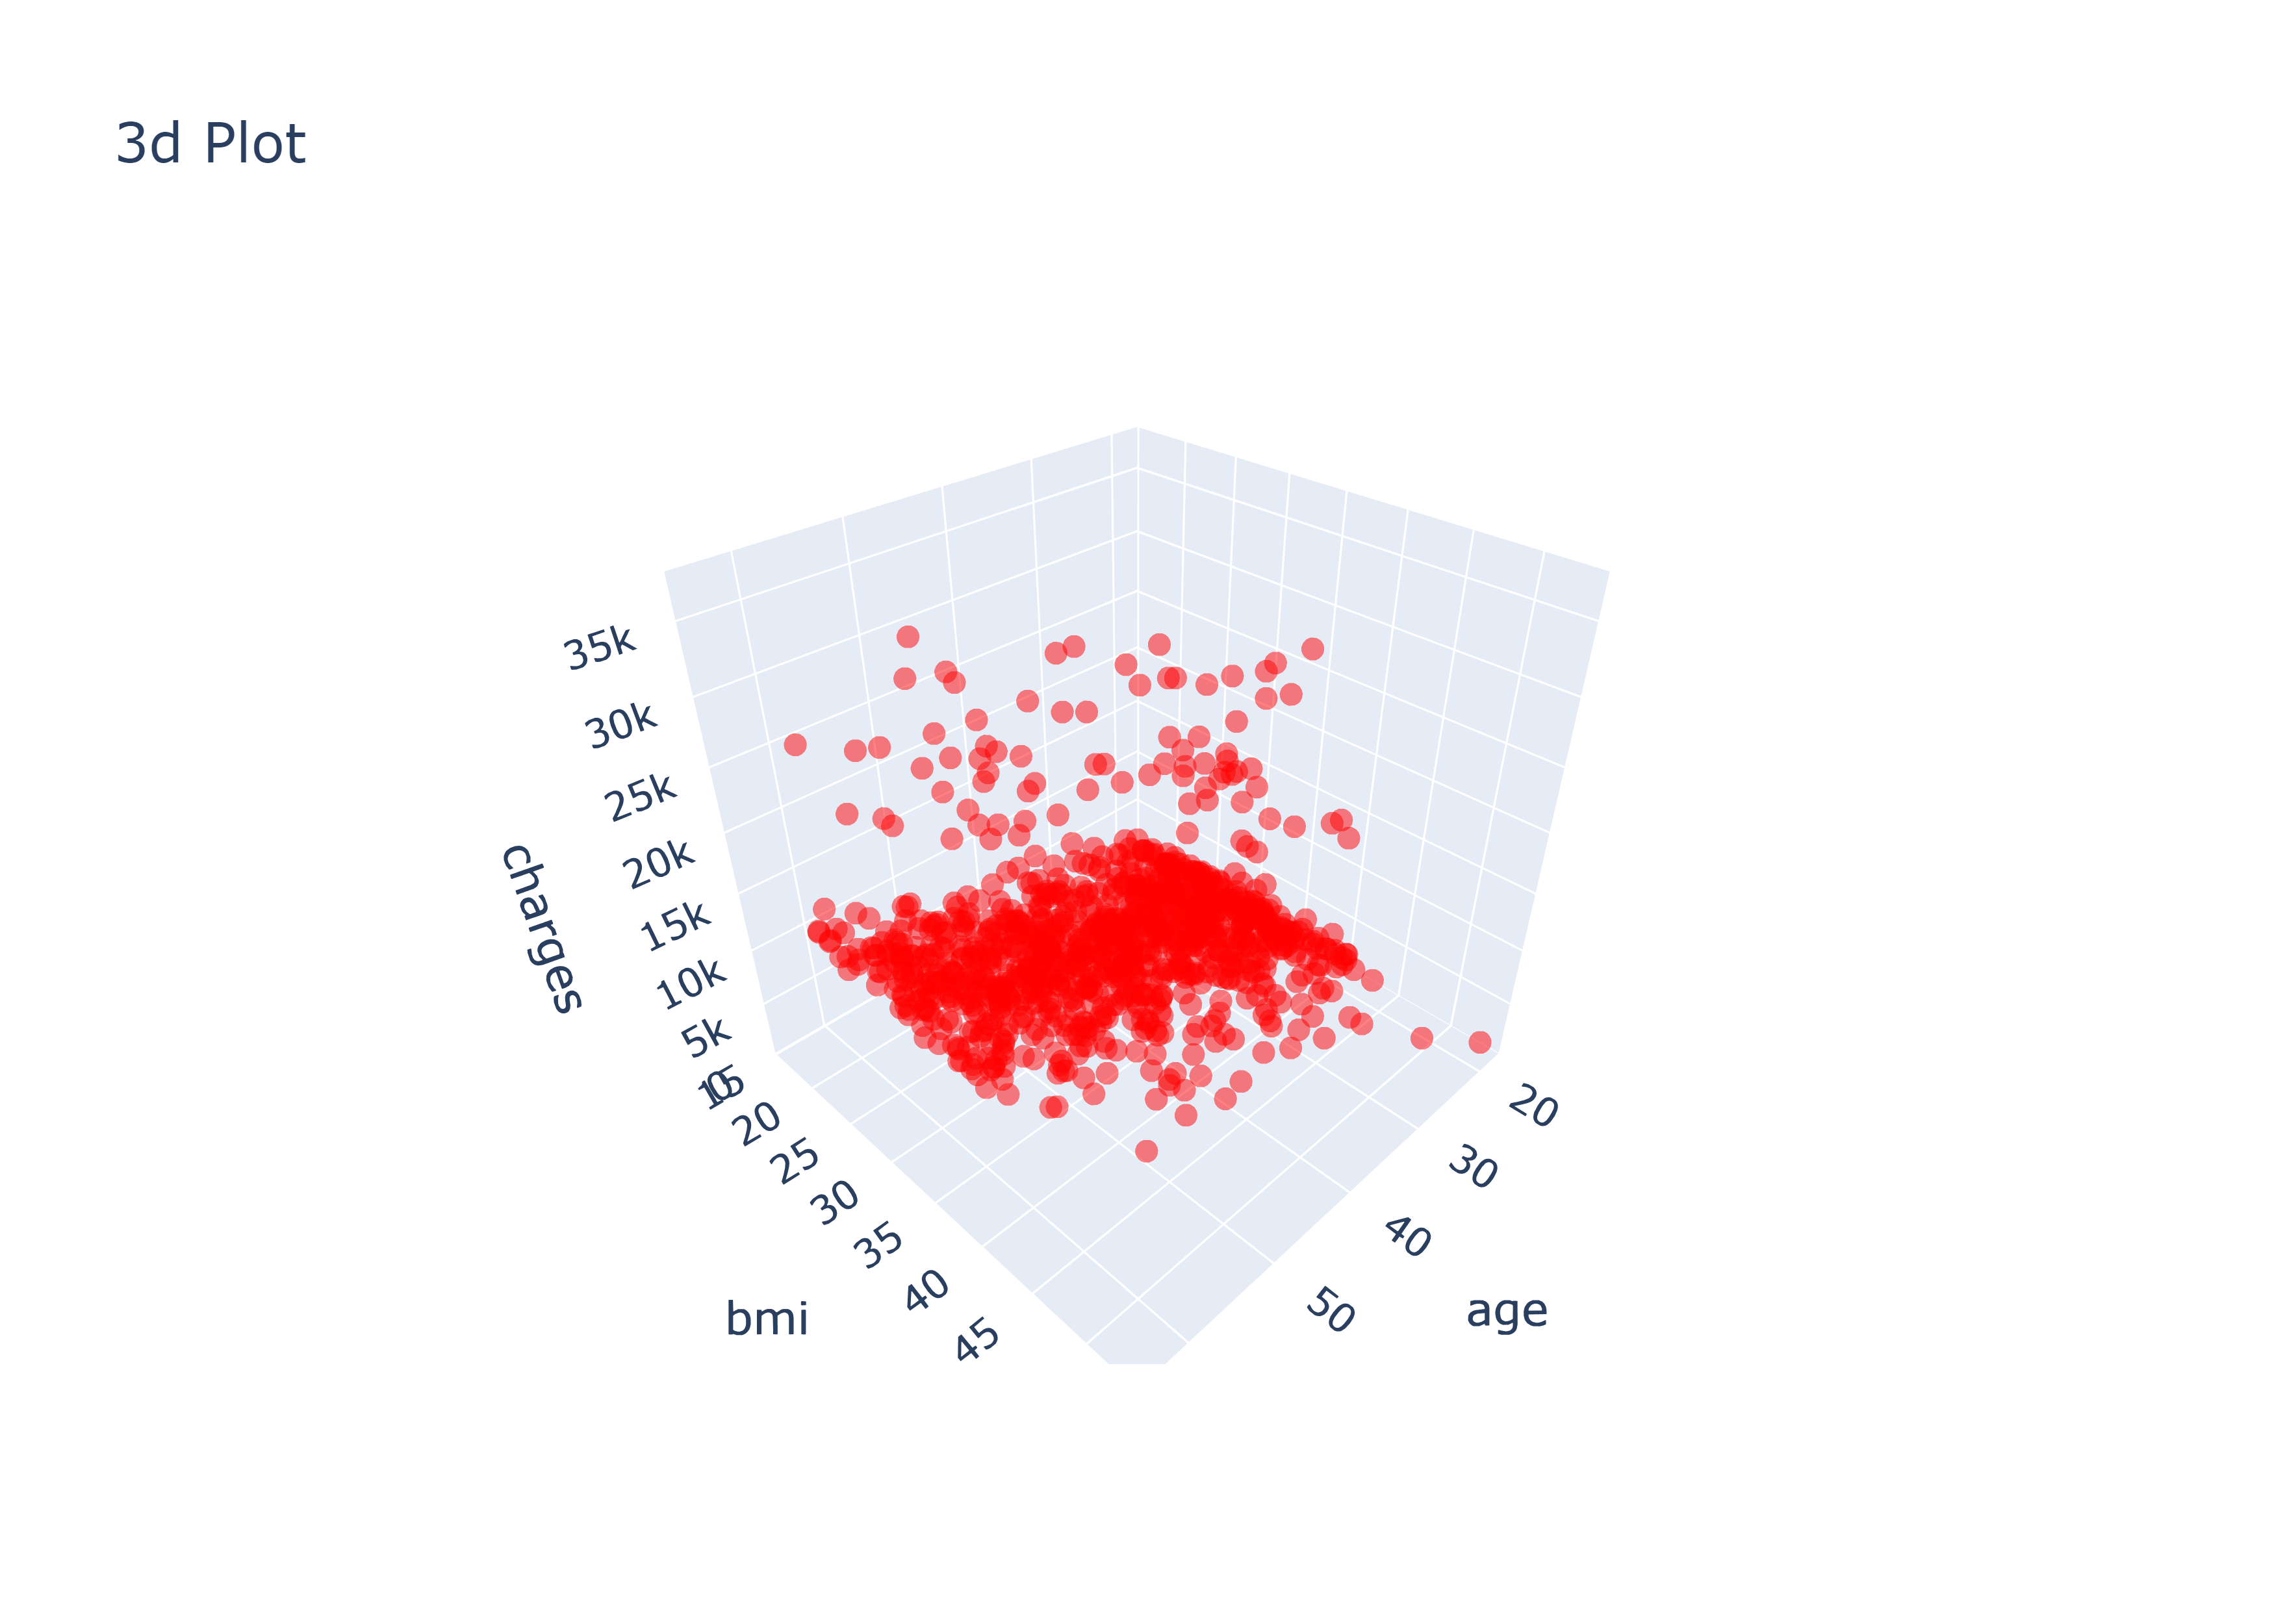

In [16]:
fig = px.scatter_3d(non_smoker, x='age', y='bmi', z='charges',color_discrete_sequence=["red"],title ="3d Plot")
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.write_image("plot.png",scale=5)
Image("plot.png")

# FInding Correlations

In [17]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [18]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362884

In [19]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [20]:
smoker_value={"yes":1,"no":0}
smoker_numeric=medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numeric)

0.7872514304984767

In [21]:
cor =medical_df.corr()
cor

C:\Users\iamri\AppData\Local\Temp\ipykernel_19832\1742509335.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

##  HeatMap

<Axes: >

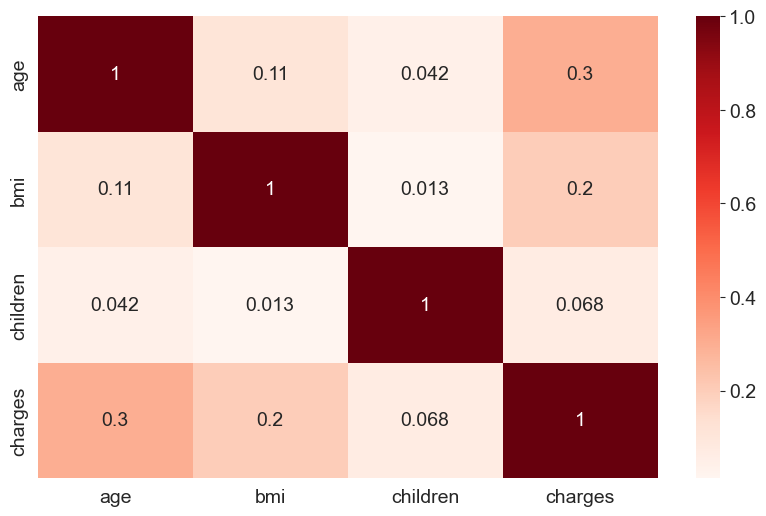

In [22]:
sns.heatmap(cor,annot=True,cmap="Reds")

In [23]:
def reg(age,w,b):
    return age*w+b

In [24]:
w=50
b= 100

In [25]:
age=non_smoker.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [26]:
estimate_charge=reg(age,w,b)
estimate_charge

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [27]:
target = non_smoker.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

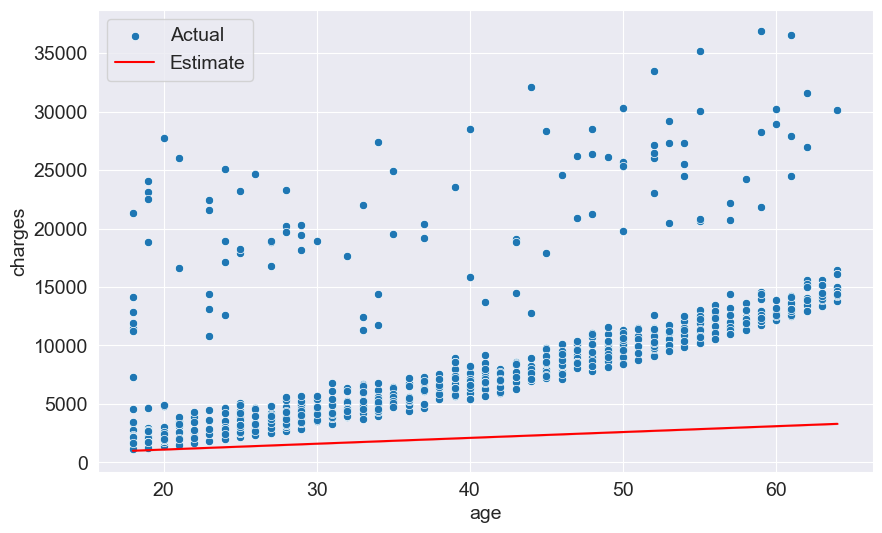

In [28]:
sns.scatterplot(non_smoker,x='age',y='charges')
sns.lineplot(x=age,y=estimate_charge,color='red')
plt.legend(['Actual','Estimate'])

plt.show()

In [29]:
import numpy as np
from numpy import *

In [30]:
def rmse(target,prediction):
    return sqrt(mean(square(prediction-target)))

In [31]:
def params(w,b):
    ages=non_smoker.age
    target = non_smoker.charges
    predictions = reg(ages,w,b)
    
    sns.scatterplot(non_smoker,x='age',y='charges')
    sns.lineplot(x=ages,y=predictions,color='red')
    plt.legend(['Actual','Estimate'])
    plt.show()
    
    print("The RMSE Of The date is :- ",rmse(target,predictions))
    

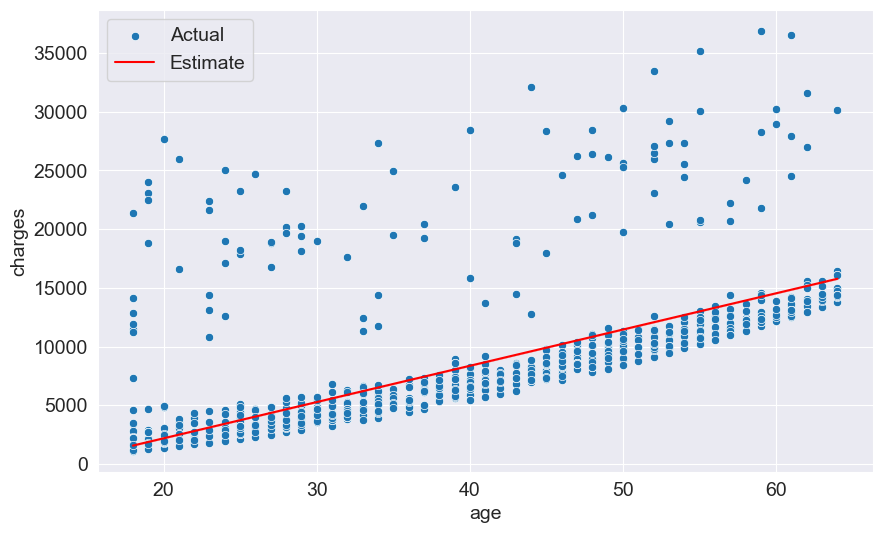

The RMSE Of The date is :-  4706.82242376741


In [32]:
params(309,-4000)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
inputs = non_smoker[["age"]]
target = non_smoker.charges

In [36]:
model.fit(inputs,target)

LinearRegression()

In [37]:
pre=model.predict(inputs)
pre

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [38]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [39]:
rmse(pre,target)

4662.505766636395

In [40]:
model.coef_

array([267.24891283])

In [41]:
model.intercept_

-2091.4205565650827

In [42]:
inputs1 = non_smoker[["age","bmi"]]
target1 = non_smoker.charges

In [43]:
model.fit(inputs1,target)

LinearRegression()

In [44]:
pre=model.predict(inputs1)
pre

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [45]:
rmse(target,pre)

4662.3128354612945

In [46]:
sex_value={"male":1,"female":0}
sex_numeric=medical_df.sex.map(sex_value)

region_value={"southwest":1,"southeast":2,"northwest":3,"northeast":4}
region_numeric=medical_df.region.map(region_value)

smoker_value={"yes":1,"no":0}
smoker_numeric=medical_df.smoker.map(smoker_value)

In [47]:
medical_df["RV"],medical_df["Sex_Values"],medical_df["smoker_values"]=region_numeric,sex_numeric,smoker_numeric

In [48]:
medical_df

age     sex     bmi  children smoker     region      charges  RV  \
0      19  female  27.900         0    yes  southwest  16884.92400   1   
1      18    male  33.770         1     no  southeast   1725.55230   2   
2      28    male  33.000         3     no  southeast   4449.46200   2   
3      33    male  22.705         0     no  northwest  21984.47061   3   
4      32    male  28.880         0     no  northwest   3866.85520   3   
...   ...     ...     ...       ...    ...        ...          ...  ..   
1333   50    male  30.970         3     no  northwest  10600.54830   3   
1334   18  female  31.920         0     no  northeast   2205.98080   4   
1335   18  female  36.850         0     no  southeast   1629.83350   2   
1336   21  female  25.800         0     no  southwest   2007.94500   1   
1337   61  female  29.070         0    yes  northwest  29141.36030   3   

      Sex_Values  smoker_values  
0              0              1  
1              1              0  
2              1              0  
3              1              0  
4              1              0  
...          ...            ...  
1333           1              0  
1334           0              0  
1335           0              0  
1336           0              0  
1337           0              1  

[1338 rows x 10 columns]

In [49]:
model = LinearRegression()
inputs2 = medical_df[['age','bmi','children',"RV","Sex_Values","smoker_values"]]
target = medical_df.charges
model.fit(inputs2,target)
predictions= model.predict(inputs2)
predictions

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

In [50]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
rmse(predictions,target)

6043.811701706331

In [52]:
encoded_columns=pd.get_dummies(medical_df['region'],prefix='Region')
medical_df=pd.concat([medical_df,encoded_columns],axis=1)
medical_df

age     sex     bmi  children smoker     region      charges  RV  \
0      19  female  27.900         0    yes  southwest  16884.92400   1   
1      18    male  33.770         1     no  southeast   1725.55230   2   
2      28    male  33.000         3     no  southeast   4449.46200   2   
3      33    male  22.705         0     no  northwest  21984.47061   3   
4      32    male  28.880         0     no  northwest   3866.85520   3   
...   ...     ...     ...       ...    ...        ...          ...  ..   
1333   50    male  30.970         3     no  northwest  10600.54830   3   
1334   18  female  31.920         0     no  northeast   2205.98080   4   
1335   18  female  36.850         0     no  southeast   1629.83350   2   
1336   21  female  25.800         0     no  southwest   2007.94500   1   
1337   61  female  29.070         0    yes  northwest  29141.36030   3   

      Sex_Values  smoker_values  Region_northeast  Region_northwest  \
0              0              1                 0                 0   
1              1              0                 0                 0   
2              1              0                 0                 0   
3              1              0                 0                 1   
4              1              0                 0                 1   
...          ...            ...               ...               ...   
1333           1              0                 0                 1   
1334           0              0                 1                 0   
1335           0              0                 0                 0   
1336           0              0                 0                 0   
1337           0              1                 0                 1   

      Region_southeast  Region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 14 columns]

In [53]:
inputs4 = medical_df[["age","bmi","children","smoker_values","Sex_Values","Region_northeast","Region_northwest","Region_southeast","Region_southwest"]]
target=medical_df.charges
model.fit(inputs4,target)
predicted=model.predict(inputs4)
predicted

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [54]:
rmse(predicted,target)

6041.6796511744515

In [55]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [56]:
weights_df = pd.DataFrame({"features":["age","bmi","children","smoker_values","Sex_Values","Region_northeast","Region_northwest","Region_southeast","Region_southwest",1],"weight": np.append(model.coef_,model.intercept_)})

In [57]:
weights_df

features        weight
0               age    256.856353
1               bmi    339.193454
2          children    475.500545
3     smoker_values  23848.534542
4        Sex_Values   -131.314359
5  Region_northeast    587.009235
6  Region_northwest    234.045336
7  Region_southeast   -448.012814
8  Region_southwest   -373.041756
9                 1 -12525.547811